In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('electronics_sales.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          14 non-null     object
 1   Order_Date        14 non-null     object
 2   Product_ID        14 non-null     object
 3   Product_Name      14 non-null     object
 4   Category          14 non-null     object
 5   Brand             14 non-null     object
 6   Unit_Price        14 non-null     int64 
 7   Quantity          14 non-null     int64 
 8   Discount_Percent  14 non-null     int64 
 9   Total_Sales       14 non-null     int64 
 10  Cost_Price        14 non-null     int64 
 11  Profit            14 non-null     int64 
 12  Customer_Type     14 non-null     object
 13  City              14 non-null     object
 14  Store_Type        14 non-null     object
 15  Payment_Mode      14 non-null     object
dtypes: int64(6), object(10)
memory usage: 1.9+ KB


,Unit_Price,Quantity,Discount_Percent,Total_Sales,Cost_Price,Profit
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,24985.714286,2.642857,5.928571,29161.428571,20964.285714,3568.571429
std,23021.757506,2.097880,3.970357,16104.528201,19903.985188,1142.088890
min,1800.000000,1.000000,0.000000,11970.000000,1200.000000,1960.000000
25%,4575.000000,1.000000,5.000000,16275.000000,3250.000000,2512.500000
50%,18500.000000,1.500000,5.000000,23745.000000,15250.000000,3525.000000
75%,41000.000000,3.750000,9.500000,37740.000000,34500.000000,4345.000000
max,65000.000000,7.000000,12.000000,58500.000000,56000.000000,5400.000000


In [3]:
df.isnull().sum()


Order_ID            0
Order_Date          0
Product_ID          0
Product_Name        0
Category            0
Brand               0
Unit_Price          0
Quantity            0
Discount_Percent    0
Total_Sales         0
Cost_Price          0
Profit              0
Customer_Type       0
City                0
Store_Type          0
Payment_Mode        0
dtype: int64

In [4]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          14 non-null     object        
 1   Order_Date        14 non-null     datetime64[ns]
 2   Product_ID        14 non-null     object        
 3   Product_Name      14 non-null     object        
 4   Category          14 non-null     object        
 5   Brand             14 non-null     object        
 6   Unit_Price        14 non-null     int64         
 7   Quantity          14 non-null     int64         
 8   Discount_Percent  14 non-null     int64         
 9   Total_Sales       14 non-null     int64         
 10  Cost_Price        14 non-null     int64         
 11  Profit            14 non-null     int64         
 12  Customer_Type     14 non-null     object        
 13  City              14 non-null     object        
 14  Store_Type        14 non-nul

In [5]:
total_revenue = df['Total_Sales'].sum()
total_profit = df['Profit'].sum()

total_revenue,total_profit

(np.int64(408260), np.int64(49960))

The electronics shop generated total sales of ₹408260 with an overall profit of ₹49960 across the year, indicating profitable operations across multiple product categories and cities.

In [6]:
category_revenue = (
    df.groupby('Category')[['Total_Sales','Profit']]
    .sum()
    .sort_values('Profit', ascending=False)
)
category_revenue

,Total_Sales,Profit
Category,,
Accessories,59470,16670
Wearables,30780,7780
Home Appliances,124900,6900
Laptops,102860,6860
Mobile Phones,52250,6750
Tablets,38000,5000


In [7]:
brand_revenue = (
    df.groupby('Brand')[['Total_Sales', 'Profit']]
    .sum()
    .sort_values("Total_Sales", ascending=False)
)
brand_revenue

,Total_Sales,Profit
Brand,,
Sony,58500,2500
Dell,53360,4360
Samsung,52250,6750
HP,49500,2500
Apple,38000,5000
Voltas,36960,1960
Noise,30780,7780
LG,29440,2440
JBL,18000,5400


Insight: Brands like Sony and Dell led to highest sales but Noise and Samsung generated the highest profit.

In [8]:
store_performance = (
    df.groupby('Store_Type')[['Total_Sales', 'Profit']]
    .sum()
)
store_performance

,Total_Sales,Profit
Store_Type,,
Offline,215140,29540
Online,193120,20420


Insight: Offline stores currently generate higher overall revenue.

In [9]:
import matplotlib.pyplot as plt

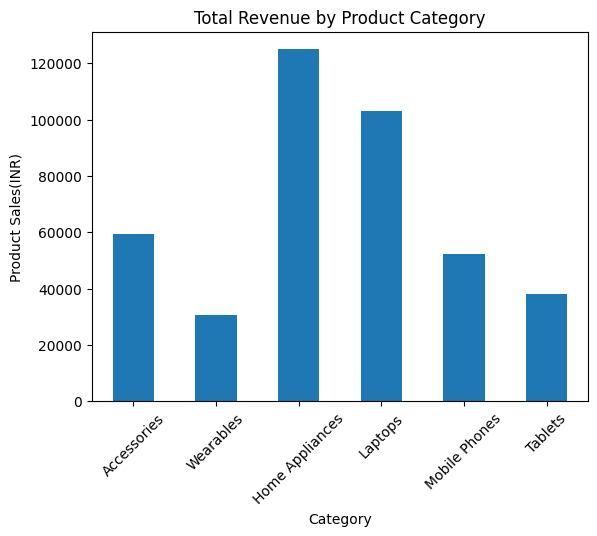

In [11]:
category_revenue['Total_Sales'].plot(kind='bar')
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Product Sales(INR)')
plt.xticks(rotation=45)
plt.show()

In [21]:
discount_profit = (
    df.groupby('Discount_Percent')['Profit']
    .sum()
    .reset_index()
)
discount_profit

,Discount_Percent,Profit
0,0,15400
1,5,18100
2,8,6800
3,10,7700
4,12,1960


In [25]:
customer_sales = (
    df.groupby('Customer_Type')[['Total_Sales','Profit']]
    .sum()
)
customer_sales

,Total_Sales,Profit
Customer_Type,,
New,202680,29880
Returning,205580,20080


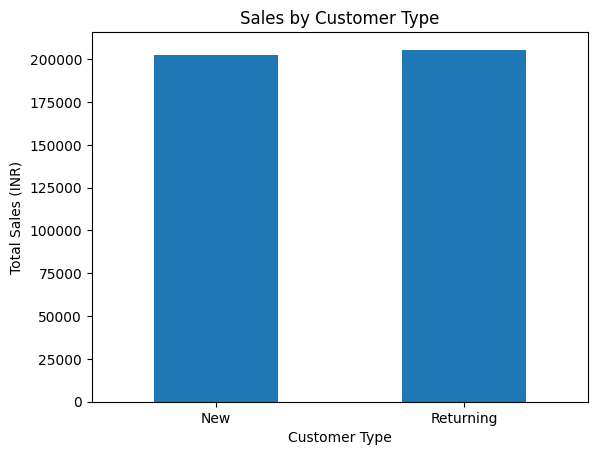

In [29]:
customer_sales['Total_Sales'].plot(kind='bar')
plt.title('Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=0)
plt.show()


In [ ]:
payment_mode = (
    df.groupby('Payment_Mode')['Total_Sales']
    .sum()
)
payment_mode

Payment_Mode
Card    207170
Cash     47500
UPI     153590
Name: Total_Sales, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

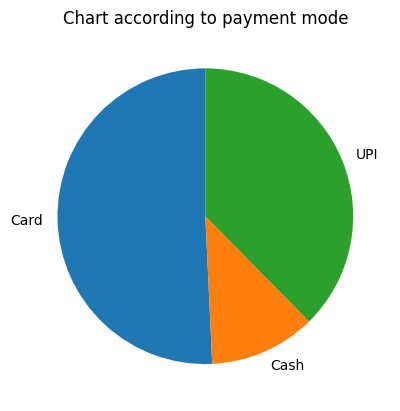

In [45]:
labels=['Card','Cash','UPI']
plt.pie(payment_mode,labels=labels, startangle=90)
plt.title('Chart according to payment mode')
plt.show

Insight: Card payments are the most preferred payment mode among customers, followed by UPI, while cash transactions are comparatively lower, indicating a strong shift toward digital payment methods in electronics retail.